In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
def create_dataset(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [3]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [4]:
SEQ_LENGTH = 50
NUM_EPOCHS = 100
LR = 0.001

np.random.seed(42)
time = np.linspace(0, 100, 1000)
data = np.sin(time)

scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

In [5]:
X, y = create_dataset(data, SEQ_LENGTH)
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

In [6]:
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [7]:
model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [8]:
for epoch in range(NUM_EPOCHS):
    model.train()
    output = model(X_train)
    loss = criterion(output, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.1070
Epoch [20/100], Loss: 0.0869
Epoch [30/100], Loss: 0.0645
Epoch [40/100], Loss: 0.0364
Epoch [50/100], Loss: 0.0181
Epoch [60/100], Loss: 0.0090
Epoch [70/100], Loss: 0.0050
Epoch [80/100], Loss: 0.0022
Epoch [90/100], Loss: 0.0006
Epoch [100/100], Loss: 0.0002


In [9]:
model.eval()
with torch.no_grad():
    predicted = model(X_test).squeeze().numpy()
    actual = y_test.squeeze().numpy()

In [10]:
predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).flatten()
actual = scaler.inverse_transform(actual.reshape(-1, 1)).flatten()

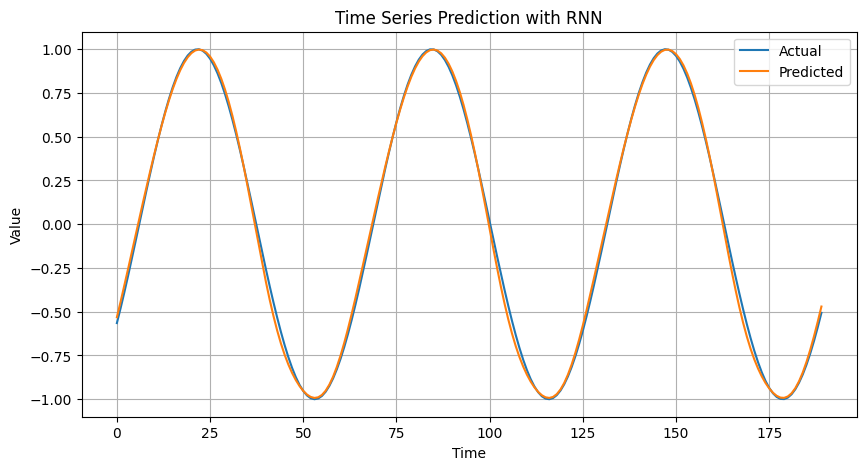

In [11]:
plt.figure(figsize=(10,5))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.title('Time Series Prediction with RNN')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()